In [1]:
%matplotlib notebook
from pylab import *  
import numpy as np
import random
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.animation as animation

In [2]:
# Energy difference is for Hamiltonian H = J/2 Sum_ijk of A_ij*A_jk
def deltaE(i,j):
    return J*( -2*lattice[i,j]+1 )*( sum(lattice[i:]) + sum(lattice[:j]) ) + J
    
def mcstep(*args):
    i,j = np.random.randint(l), np.random.randint(l)
#     print(i,j)
    if i == j: # Adjacency is always zero on the diagonal so we skip i==j
        return
    
    # Calculate Energy difference and run through Metropolis Algorithm
    E_diff = deltaE(i,j)
    if E_diff <= 0:
        if lattice[i,j] == 0:
            lattice[i,j] += 1
            lattice[j,i] = lattice[i,j]
        else:
            lattice[i,j] *= 0
            lattice[j,i] = lattice[i,j] 
    else:
        if random.random() < math.exp(-E_diff/T):
            if lattice[i,j] == 0:
                lattice[i,j] += 1
                lattice[j,i] = lattice[i,j]
            else:
                lattice[i,j] *= 0
                lattice[j,i] = lattice[i,j]
#     print(lattice)
#     return lattice     
    grid.set_array(lattice.ravel())   
    return grid,               
    
def init(i):
    # Initialize lattice of zeros
    if i == 0:
        lattice = np.zeros([l,l], dtype=int)
    
    # Initialize random lattice of zeros and ones
    if i != 0:
        lattice = np.zeros([l,l], dtype=int)
        for i in range(0,l):                    
            for j in range(0,l):
                if i == j:
                    lattice[i,j] = 5

        for i in range(0,l):                    
            for j in range(0,l):
                if i == j:
                    lattice[i,i] = 0
                    continue;
                elif random.random() < 0.5:          
                    lattice[i,j], lattice[j,i] = 1, 1
                else:
                    lattice[i,j], lattice[j,i] = 0, 0
    return lattice 

<IPython.core.display.Javascript object>


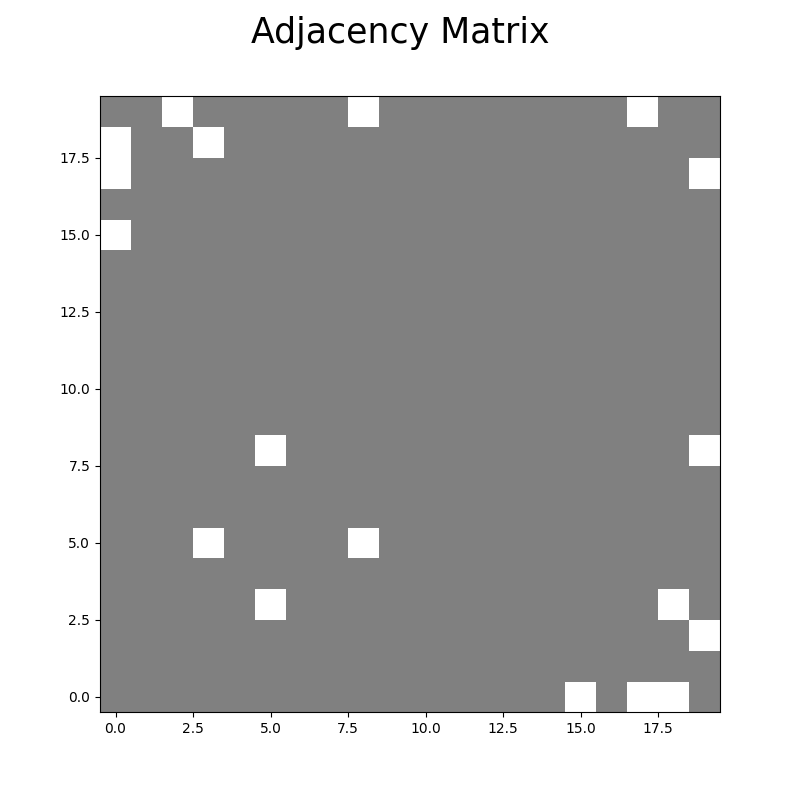

In [3]:
l = 20 
J = 1 
T = 5
N = 200000 

lattice = init(0)

fig = plt.figure(figsize=(8,8),dpi=80)
fig.suptitle("Adjacency Matrix", fontsize=25) 
grid = plt.pcolormesh(range(l),range(l),lattice,shading='nearest',cmap = "gray", vmin=-1, vmax=1)                                  
animation.FuncAnimation(fig, mcstep, frames = N, interval = 2, blit = True)

In [ ]:
# writergif = animation.PillowWriter(fps=150)
# ani.save('filename.gif',writer=writergif)